# Problema de Classificação

## Introdução

O problema tem como objetivo desenvolver um classificador que auxilie na aprovação de crédito. Desta forma, é possível identificar entre os clientes que atendam aos pré-requisitos básicos, aqueles que possuem alto risco de inadimplência ao solicitar produtos de crédito ou empréstimo pessoal. Essa análise será realizada através dos dados históricos de 20000 de antigos pagadores, com os quais preveremos se os 5000 novos serão ou não bons pagadores.


## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


## Compreensão do dados

### Descrição dos Dados

In [2]:
excel_file_path = '.\data\dicionario_de_dados.xlsx'
features = pd.read_excel(excel_file_path)

features 

,Coluna,Nome da Variável,Descrição,Conteúdo,Observações
0,0,id_solicitante,número sequencial de identificação do solicitante,1-20000,1-20000 no conjunto de treinamento e 20001-250...
1,1,produto_solicitado,"produto solicitado (cartão de crédito, emprést...","código numérico 1,2 ou 7",O significado dos códigos não foi informado pe...
2,2,dia_vencimento,dia_do_vencimento da fatura do cartão ou das p...,"1,5,10,15,20,25",NaN
3,3,forma_envio_solicitacao,forma de envio da solicitação de crédito (inte...,"internet, correio, presencial",NaN
4,4,tipo_endereco,tipo de endereço para correspondência informad...,"1 = residencial, 2 = outro",NaN
5,5,sexo,sexo do solicitante,"M = masculino, F = feminino, N = não informado",Há registros com esse campo vazio. Sugiro pree...
6,6,idade,idade do solicitante na época da solicitação,NaN,NaN
7,7,estado_civil,estado civil do solicitante,"0,1,2,3,4,5,6,7 (codificação não informada)",O significado dos códigos não foi informado pe...
8,8,qtde_dependentes,quantidade de dependentes informada pelo solic...,valor numérico inteiro,NaN
9,9,grau_instrucao,"grau de instrução do solicitante, numa escala ...","0,1,2,3,4,5","Por possível falha na extração, esta coluna ve..."


### Carregamento dos Dados

In [3]:
df_train = pd.read_csv(".\data\conjunto_de_treinamento.csv")

# Carregando conjunto de teste
df_test = pd.read_csv(".\data\conjunto_de_teste.csv")

#### Visuando cabeçalho do dataframe de treino

In [4]:
df_train.head()

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1


#### Descrição dos dados de treino

In [5]:
dict_type_features = {'Nome da Feature': df_train.columns, 'Tipo': df_train.dtypes.astype(str).tolist()}

info_colunas = pd.DataFrame(dict_type_features).reset_index(drop=True)
info_colunas

,Nome da Feature,Tipo
0,id_solicitante,int64
1,produto_solicitado,int64
2,dia_vencimento,int64
3,forma_envio_solicitacao,object
4,tipo_endereco,int64
5,sexo,object
6,idade,int64
7,estado_civil,int64
8,qtde_dependentes,int64
9,grau_instrucao,int64


#### Listando variáveis categóricas

In [6]:
# Inicializar listas vazias para cada tipo diferente
tipos_diferentes = set(dict_type_features["Tipo"])
listas_por_tipo = {tipo: [] for tipo in tipos_diferentes}

# Organizar os dados nas listas apropriadas
for nome, tipo in zip(dict_type_features["Nome da Feature"], dict_type_features["Tipo"]):
    listas_por_tipo[tipo].append(nome)

listas_por_tipo['object']

['forma_envio_solicitacao',
 'sexo',
 'estado_onde_nasceu',
 'estado_onde_reside',
 'possui_telefone_residencial',
 'codigo_area_telefone_residencial',
 'possui_telefone_celular',
 'vinculo_formal_com_empresa',
 'estado_onde_trabalha',
 'possui_telefone_trabalho',
 'codigo_area_telefone_trabalho']

#### Descrevendo variáveis numéricas

In [7]:
df_train_features_numericals = df_train[listas_por_tipo['float64']] + df_train[listas_por_tipo['int64']]
df_train.describe()

,id_solicitante,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,tipo_residencia,...,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,19464.000000,...,2.000000e+04,20000.000000,20000.000000,16903.000000,17022.000000,8486.000000,7140.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.0,0.961600,1.261303,...,2.095614e+03,0.339050,0.008900,8.045081,2.533310,3.708107,0.288095,581.295250,581.295250,0.500000
std,5773.647028,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.0,0.202305,0.883580,...,4.403344e+04,0.473399,0.388881,3.210790,1.532765,5.181241,0.944339,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,5000.750000,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,10000.500000,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,15000.250000,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,0.0,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,20000.000000,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,0.0,2.000000,5.000000,...,6.000000e+06,1.000000,32.000000,17.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


### Tratamento de Dados Faltantes

- Verificando quantidade de dados faltantes

In [8]:
# Substitua todos os campos vazios por NaN
df_train.replace('', np.nan, inplace=True)
df_train.replace(' ', np.nan, inplace=True)
df_train

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,NaN,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,NaN,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,NaN,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,NaN,0,9.0,5.0,NaN,NaN,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,presencial,1,M,27,2,0,0,...,N,NaN,0,9.0,1.0,0.0,0.0,308.0,308.0,0
19996,19997,1,20,presencial,1,F,26,2,1,0,...,N,NaN,0,9.0,2.0,0.0,0.0,639.0,639.0,0
19997,19998,1,10,internet,1,F,63,2,0,0,...,N,NaN,0,9.0,1.0,NaN,NaN,486.0,486.0,0
19998,19999,1,5,internet,1,F,84,1,0,0,...,N,NaN,0,NaN,NaN,NaN,NaN,590.0,590.0,0


In [9]:
tabela_dados_faltantes = df_train.isnull().sum().reset_index()
tabela_dados_faltantes.columns = ['Feature', 'Dados Faltantes']
tabela_dados_faltantes

,Feature,Dados Faltantes
0,id_solicitante,0
1,produto_solicitado,0
2,dia_vencimento,0
3,forma_envio_solicitacao,0
4,tipo_endereco,0
5,sexo,7
6,idade,0
7,estado_civil,0
8,qtde_dependentes,0
9,grau_instrucao,0


In [10]:
#treino
df_train['sexo'] = df_train['sexo'].str.replace(' ','N') #substitiur vazios por N
df_train['estado_onde_reside'] = df_train['sexo'].str.replace(' ','XX') #substitiur vazios por XX

#teste
df_test['sexo'] = df_test['sexo'].str.replace(' ','N') #substitiur vazios por N
df_test['estado_onde_reside'] = df_test['sexo'].str.replace(' ','XX') #substitiur vazios por XX


- Colunas com grande quantidade de dados faltantes serão removidas: grau_instrucao_companheiro, profissao_companheiro, estado_onde_trabalha, codigo_area_telefone_trabalho


In [11]:
df_train = df_train.drop('grau_instrucao_companheiro', axis=1)
df_train = df_train.drop('profissao_companheiro', axis=1)
df_train = df_train.drop('estado_onde_trabalha', axis=1)
df_train = df_train.drop('codigo_area_telefone_trabalho', axis=1)


df_test = df_test.drop('grau_instrucao_companheiro', axis=1)
df_test = df_test.drop('profissao_companheiro', axis=1)
df_test = df_test.drop('estado_onde_trabalha', axis=1)
df_test = df_test.drop('codigo_area_telefone_trabalho', axis=1)

### Análise Exploratória de Dados

#### Colunas do dataframe

In [12]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'possui_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'local_onde_reside',
       'local_onde_trabalha', 'inadimplente'],
      dtype='object')

#### Matriz de dispersão 

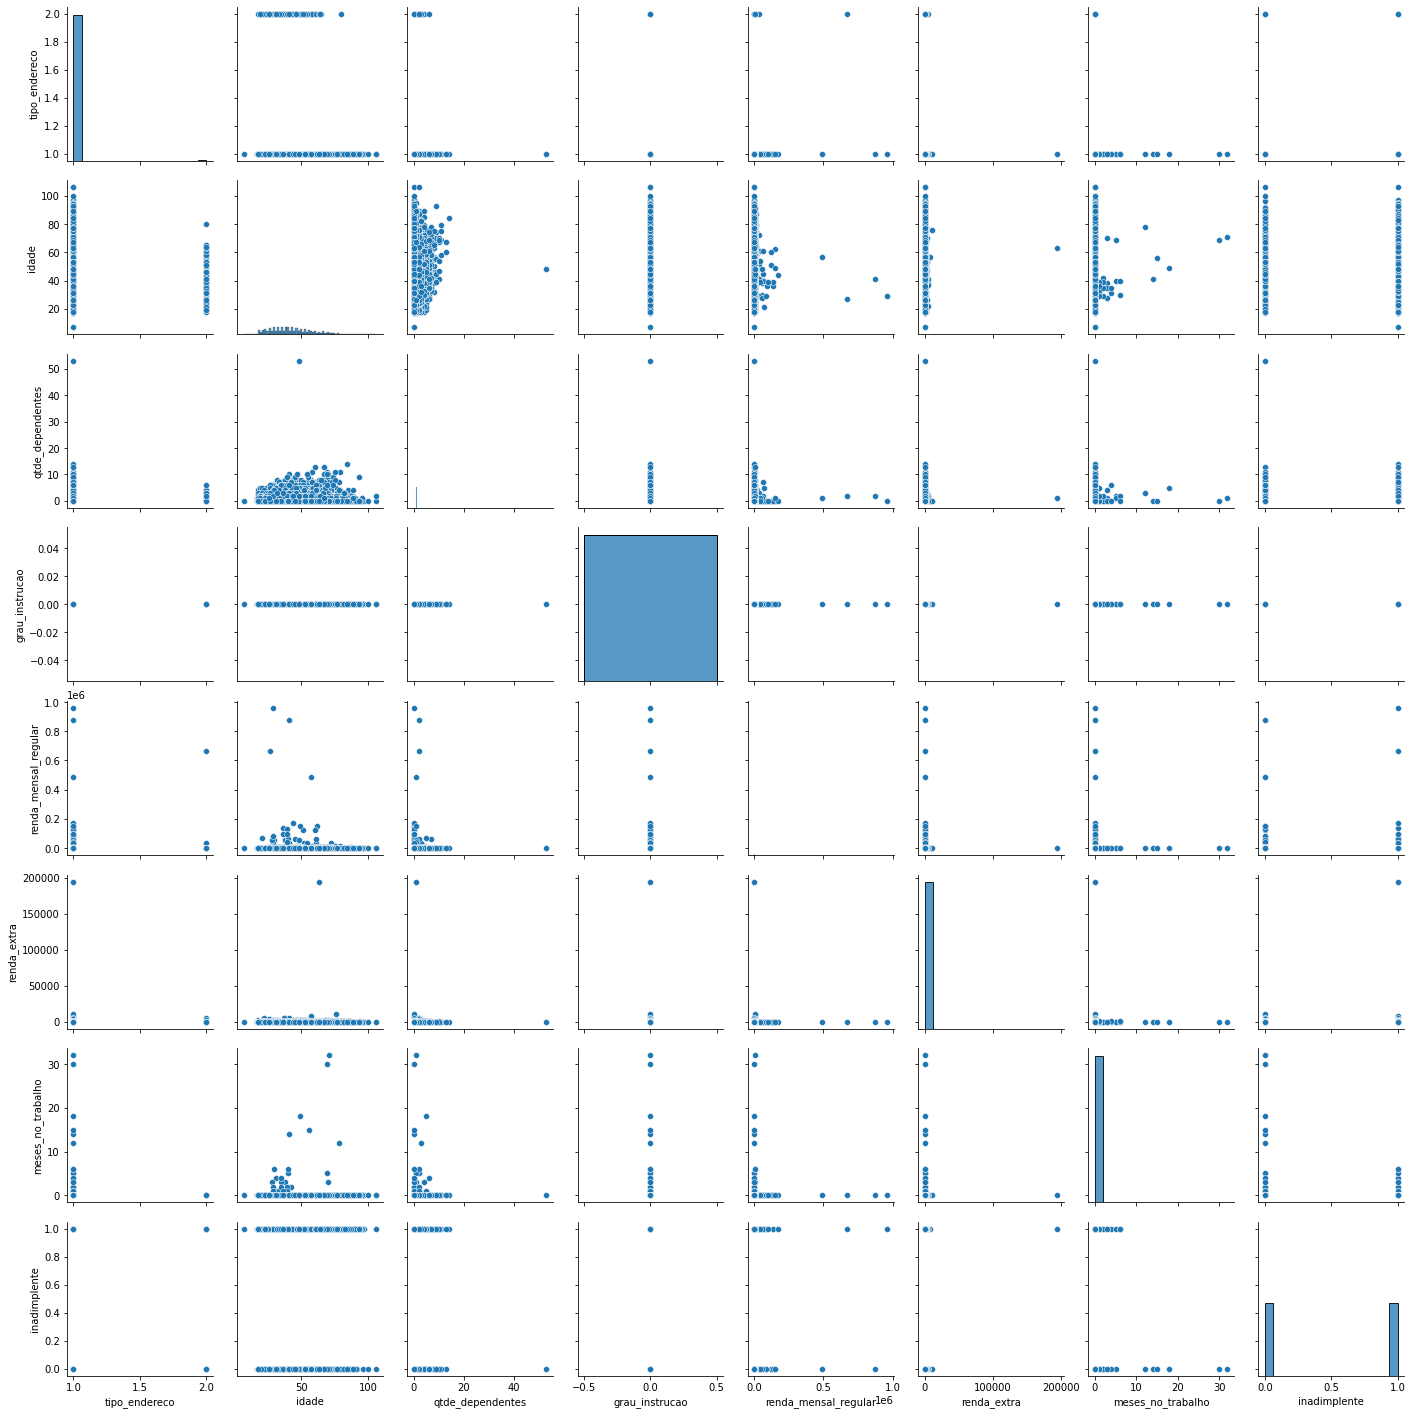

In [13]:
# Subconjunto do DataFrame contendo apenas as colunas mencionadas
selected_columns = ['tipo_endereco', 'idade','qtde_dependentes', 'grau_instrucao','renda_mensal_regular', 'renda_extra', 'meses_no_trabalho', 'inadimplente']
df_subset = df_train[selected_columns]

sns.pairplot(df_subset)
plt.show()

## Pré-processamento de Dados

### Codificação de variáveis categóricas

- Features Categóricas


In [14]:

''' ['forma_envio_solicitacao',
 'sexo',
 'estado_onde_nasceu',
 'estado_onde_reside',
 'possui_telefone_residencial',
 'codigo_area_telefone_residencial',
 'possui_telefone_celular',
 'vinculo_formal_com_empresa',
 'estado_onde_trabalha',
 'possui_telefone_trabalho',
 'codigo_area_telefone_trabalho']
 '''

" ['forma_envio_solicitacao',\n 'sexo',\n 'estado_onde_nasceu',\n 'estado_onde_reside',\n 'possui_telefone_residencial',\n 'codigo_area_telefone_residencial',\n 'possui_telefone_celular',\n 'vinculo_formal_com_empresa',\n 'estado_onde_trabalha',\n 'possui_telefone_trabalho',\n 'codigo_area_telefone_trabalho']\n "

- One-Hot Encoding

In [15]:
# produto_solicitado -> #1, #2, #3, #4, #5, #6, #7
# forma_envio_solicitacao ->  #correio, internet, presencial
# sexo -> #F, M e N


df_train = pd.get_dummies(df_train,columns=['produto_solicitado', 
                                            'forma_envio_solicitacao',
                                            'sexo']) 

df_test = pd.get_dummies(df_test,columns=['produto_solicitado', 
                                            'forma_envio_solicitacao',
                                            'sexo']) 

- Label Binarizer: Converte rótulos em inteiros, não tendo ordem nominal entre os valores da feature

In [16]:
def binarizador(colunas_a_binarizar, dataframe):
    binarizador = LabelBinarizer()
    for feature in colunas_a_binarizar:
        dataframe[feature] = binarizador.fit_transform(dataframe[feature])

    return dataframe

In [17]:
# possui_telefone_residencial -> #Y, N
# vinculo_formal_com_empresa ->  #Y, N
# possui_telefone_trabalho -> #Y, N

colunas_a_binarizar = ['possui_telefone_residencial', 'vinculo_formal_com_empresa', 'possui_telefone_trabalho']

df_train = binarizador(colunas_a_binarizar, df_train)
df_test = binarizador(colunas_a_binarizar, df_test)

### Dropando Features

- grau_instrucao_companheiro, profissao_companheiro, estado_onde_trabalha e codigo_area_telefone_trabalho foram removidas, pois tinham uma grande quantidade de dados faltantes
- possui_telefone_celular tem valor N para todos os dados, sendo removido também
- estado_onde_nasceu e estado_onde_reside serão removidas por serem features categoricas não codificadas

In [18]:
df_train = df_train.drop('possui_telefone_celular', axis=1)
df_train = df_train.drop('estado_onde_nasceu', axis=1)
df_train = df_train.drop('estado_onde_reside', axis=1)


df_test = df_test.drop('possui_telefone_celular', axis=1)
df_test = df_test.drop('estado_onde_nasceu', axis=1)
df_test = df_test.drop('estado_onde_reside', axis=1)


### Substindo NaN pela média

- A feature meses_na_residencia pode ter seus valores NaN substituídos pelas média da mesma

In [19]:
# Calcula a média da feature
mean = df_train["meses_na_residencia"].mean()

# Substitui os NaN pela média da feature
df_train["meses_na_residencia"] = df_train["meses_na_residencia"].fillna(mean)


# Calcula a média da feature
mean = df_test["meses_na_residencia"].mean()

# Substitui os NaN pela média da feature
df_test["meses_na_residencia"] = df_test["meses_na_residencia"].fillna(mean)

## Modelagem

### Seleção de Features

#### Removemos as features que não são de interesse ou não parecem ter muita correlação pelas análises

In [20]:
df_train.columns

Index(['id_solicitante', 'dia_vencimento', 'tipo_endereco', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_email',
       'renda_mensal_regular', 'renda_extra', 'possui_cartao_visa',
       'possui_cartao_mastercard', 'possui_cartao_diners',
       'possui_cartao_amex', 'possui_outros_cartoes', 'qtde_contas_bancarias',
       'qtde_contas_bancarias_especiais', 'valor_patrimonio_pessoal',
       'possui_carro', 'vinculo_formal_com_empresa',
       'possui_telefone_trabalho', 'meses_no_trabalho', 'profissao',
       'ocupacao', 'local_onde_reside', 'local_onde_trabalha', 'inadimplente',
       'produto_solicitado_1', 'produto_solicitado_2', 'produto_solicitado_7',
       'forma_envio_solicitacao_correio', 'forma_envio_solicitacao_internet',
       'forma_envio_solicitacao_presencial', 'sexo_F', 'sexo_M', 'sexo_N'],
    

In [21]:
#colunas selecionas

colunas_selecionadas = df_train.columns.tolist()
colunas_selecionadas.remove('id_solicitante')  #removida pois é o id
colunas_selecionadas.remove('inadimplente') # removida pois é o target

colunas_selecionadas.remove('codigo_area_telefone_residencial') #removidas por ter dados NaN não tratados
colunas_selecionadas.remove('tipo_residencia') #removidas por ter dados NaN não tratados
colunas_selecionadas.remove('profissao') #removidas por ter dados NaN não tratados
colunas_selecionadas.remove('ocupacao') #removidas por ter dados NaN não tratados


colunas_selecionadas

['dia_vencimento',
 'tipo_endereco',
 'idade',
 'estado_civil',
 'qtde_dependentes',
 'grau_instrucao',
 'nacionalidade',
 'possui_telefone_residencial',
 'meses_na_residencia',
 'possui_email',
 'renda_mensal_regular',
 'renda_extra',
 'possui_cartao_visa',
 'possui_cartao_mastercard',
 'possui_cartao_diners',
 'possui_cartao_amex',
 'possui_outros_cartoes',
 'qtde_contas_bancarias',
 'qtde_contas_bancarias_especiais',
 'valor_patrimonio_pessoal',
 'possui_carro',
 'vinculo_formal_com_empresa',
 'possui_telefone_trabalho',
 'meses_no_trabalho',
 'local_onde_reside',
 'local_onde_trabalha',
 'produto_solicitado_1',
 'produto_solicitado_2',
 'produto_solicitado_7',
 'forma_envio_solicitacao_correio',
 'forma_envio_solicitacao_internet',
 'forma_envio_solicitacao_presencial',
 'sexo_F',
 'sexo_M',
 'sexo_N']

### Escolha do Modelo

#### Definindo conjuntos de teste e treino

In [22]:
# selecionando colunas

X_train = df_train[colunas_selecionadas].iloc[:,:].values #pega todas as colunas selecionadas
y_train = df_train["inadimplente"].iloc[:,].values #pega somente a coluna inadimplente

# conjunto de teste (5000) sem target

X_test_output = df_test[colunas_selecionadas].iloc[:,:].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train.ravel(),
    train_size=0.8,
    shuffle=True,
    random_state=777
    )

- Verificando se há dados faltantes

In [24]:
# Calculando a soma de dados faltantes em cada coluna
soma_dados_faltantes = np.isnan(X_train).sum(axis=0)

# Criando uma tabela com os resultados
tabela_dados_faltantes = np.vstack((np.arange(X_train.shape[1]), soma_dados_faltantes)).T
tabela_dados_faltantes = tabela_dados_faltantes[tabela_dados_faltantes[:, 1].argsort()[::-1]]

# Exibindo a tabela
print("Coluna | Dados Faltantes")
print("------------------------")
for coluna, dados_faltantes in tabela_dados_faltantes:
    print(f"   {int(coluna)}   |       {int(dados_faltantes)}")

Coluna | Dados Faltantes
------------------------
   34   |       0
   8   |       0
   14   |       0
   13   |       0
   12   |       0
   11   |       0
   10   |       0
   9   |       0
   7   |       0
   16   |       0
   6   |       0
   5   |       0
   4   |       0
   3   |       0
   2   |       0
   1   |       0
   15   |       0
   17   |       0
   33   |       0
   26   |       0
   32   |       0
   31   |       0
   30   |       0
   29   |       0
   28   |       0
   27   |       0
   25   |       0
   18   |       0
   24   |       0
   23   |       0
   22   |       0
   21   |       0
   20   |       0
   19   |       0
   0   |       0


- Escrevendo dados padronizados

In [25]:
scaler = StandardScaler()

df_train_standard = pd.DataFrame(scaler.fit_transform(df_train[colunas_selecionadas+["inadimplente"]]), columns=colunas_selecionadas+["inadimplente"])

X_train_standard = df_train_standard.iloc[:,df_train_standard.columns!='inadimplente'].values #pega todas as colunas selecionadas
y_train_standard = df_train_standard["inadimplente"].iloc[:,].values #pega somente a coluna inadimplente

# conjunto de teste (5000) sem target

df_test_standard = pd.DataFrame(scaler.fit_transform(df_test[colunas_selecionadas]), columns=colunas_selecionadas)

X_test_output_standard = df_test_standard[colunas_selecionadas].iloc[:,:].values

In [26]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(
    X_train_standard, 
    y_train_standard.ravel(),
    train_size=0.8,
    shuffle=True,
    random_state=777
    )

In [27]:
# Função para submeter para o Kaggle

def submissao_kaggle(df_test, y_predict_output, nome_file):
    
    id_solicitante = df_test.loc[:,df_test.columns=='id_solicitante'].values

    id_solicitante = id_solicitante.ravel()
    y_predict_output =  y_predict_output.ravel()

    dict_input = {'id_solicitante': id_solicitante, 'inadimplente': y_predict_output}
    input_classificador = pd.DataFrame(data = dict_input)

    input_classificador.to_csv(nome_file, index = False)

#### KNN

##### Treinando modelo

- Parâmetros considerados
    - n_neighbors:
        - O número de vizinhos.
    - weights (Função peso usada na predição): 
        - Se “uniform”, então os pesos são uniformes.
        - Se “distance”, então os pesos são inversosa sua distância. 

In [28]:
def classificadorKNN(X_train, y_train, X_test, y_test):
    results = []
    for k in range(1, 50):

        model = KNeighborsClassifier(n_neighbors=k,weights='uniform')
        model.fit(X_train,y_train)
        y_predict  = model.predict(X_test)

        acuracia = accuracy_score(y_test, y_predict)

        result_uniform = [k, "uniform", acuracia]

        results.append(result_uniform)

        model = KNeighborsClassifier(n_neighbors=k,weights='distance')
        model.fit(X_train,y_train)
        y_predict  = model.predict(X_test)

        acuracia = accuracy_score(y_test, y_predict)

        result_distance = [k, "distance", acuracia]

        results.append(result_distance)

    return pd.DataFrame(results, columns=["n_neighbors", "weights", "accuracy"])
        

- Treinar o modelo KNN com o conjunto de treino sem utilizar medidas padronizadas


In [29]:
result = classificadorKNN(X_train, y_train, X_test, y_test)

- Decidindo melhor n_neighbors e melhor weights

In [30]:
result_sort = result.sort_values(by='accuracy', ascending=False)
result_sort

,n_neighbors,weights,accuracy
23,12,distance,0.54150
35,18,distance,0.54075
29,15,distance,0.54025
31,16,distance,0.53950
25,13,distance,0.53925
...,...,...,...
86,44,uniform,0.50875
88,45,uniform,0.50875
92,47,uniform,0.50775
90,46,uniform,0.50700


- Predição para os dados de teste

In [31]:
model = KNeighborsClassifier(n_neighbors=12,weights='distance')
model.fit(X_train,y_train)
y_predict_output  = model.predict(X_test_output)
submissao_kaggle(df_test, y_predict_output, "input_classificador_knn_sem_padronizacao.csv")

- Treinar o modelo KNN com o conjunto de treino utilizando medidas padronizadas

In [32]:
result = classificadorKNN(X_train_standard, y_train_standard, X_test_standard, y_test_standard)

- Decidindo melhor n_neighbors e melhor weights

In [33]:
result_sort = result.sort_values(by='accuracy', ascending=False)
result_sort

,n_neighbors,weights,accuracy
69,35,distance,0.55475
64,33,uniform,0.55425
71,36,distance,0.55350
60,31,uniform,0.55325
65,33,distance,0.55325
...,...,...,...
9,5,distance,0.52925
14,8,uniform,0.52875
4,3,uniform,0.52825
10,6,uniform,0.52375


- Predição para os dados de teste

In [34]:
model = KNeighborsClassifier(n_neighbors=98,weights='distance')
model.fit(X_train_standard,y_train_standard)
y_predict_output  = model.predict(X_test_output)
submissao_kaggle(df_test, y_predict_output, "input_classificador_knn_com_padronizacao.csv")

##### Random Forest

##### Treinando modelo

- Parâmetros considerados
    - n_estimators:
        - O número de árvores na floresta.
    - max_features: 
        - Se “sqrt”, então max_features=sqrt(n_features).
        - Se “log2”, então max_features=log2(n_features)

In [35]:
def classificadorRandomForest(X_train, y_train, X_test, y_test):
    results = []
    for k in range(1, 50):

        model = RandomForestClassifier(n_estimators=k,        max_features='sqrt',
        oob_score=True,
        max_depth=None,
        random_state=123
        )
        model.fit(X_train,y_train)
        y_predict  = model.predict(X_test)

        acuracia = accuracy_score(y_test, y_predict)

        result_uniform = [k, "sqrt", acuracia]

        results.append(result_uniform)

        model = RandomForestClassifier(n_estimators=k,        max_features='log2',
        oob_score=True,
        max_depth=None,
        random_state=123
        )
        model.fit(X_train,y_train)
        y_predict  = model.predict(X_test)

        acuracia = accuracy_score(y_test, y_predict)

        result_distance = [k, "log2", acuracia]

        results.append(result_distance)

    return pd.DataFrame(results, columns=["n_estimators", "max_features", "accuracy"])

- Treinar o modelo Random Forest com o conjunto de treino sem utilizar medidas padronizadas

In [36]:
result = classificadorRandomForest(X_train, y_train, X_test, y_test)

c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppDa

- Decidindo melhor n_neighbors e melhor weights

In [37]:
result_sort = result.sort_values(by='accuracy', ascending=False)
result_sort

,n_estimators,max_features,accuracy
64,33,sqrt,0.57250
65,33,log2,0.57250
70,36,sqrt,0.57225
71,36,log2,0.57225
74,38,sqrt,0.57200
...,...,...,...
5,3,log2,0.54075
1,1,log2,0.53275
0,1,sqrt,0.53275
3,2,log2,0.52875


- Predição para os dados de teste

In [38]:
model = RandomForestClassifier(n_estimators=33,        
max_features='sqrt',
oob_score=True,
max_depth=None,
random_state=123
)
model.fit(X_train,y_train)
y_predict_output  = model.predict(X_test_output)
submissao_kaggle(df_test, y_predict_output, "input_classificador_randomforest_sem_padronizacao.csv")

- Treinar o modelo Random Forest com o conjunto de treino utilizando medidadas padronizadas

In [39]:
result = classificadorRandomForest(X_train_standard, y_train_standard, X_test_standard, y_test_standard)

c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amand\AppDa

- Decidindo melhor n_neighbors e melhor weights

In [40]:
result_sort = result.sort_values(by='accuracy', ascending=False)
result_sort

,n_estimators,max_features,accuracy
71,36,log2,0.57425
70,36,sqrt,0.57425
55,28,log2,0.57275
54,28,sqrt,0.57275
64,33,sqrt,0.57225
...,...,...,...
5,3,log2,0.54125
1,1,log2,0.53300
0,1,sqrt,0.53300
3,2,log2,0.53000


- Predição para os dados de teste

In [41]:
model = RandomForestClassifier(n_estimators=36,        
max_features='sqrt',
oob_score=True,
max_depth=None,
random_state=123
)
model.fit(X_train_standard,y_train_standard)
y_predict_output  = model.predict(X_test_output_standard)
submissao_kaggle(df_test, y_predict_output, "input_classificador_randomforest_com_padronizacao.csv")

## Conclusão

- A partir dos dados de acurácia temos que o melhor modelo foi Random Forest, sendo este utilizado para dados padronizados.